# Libraries

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc

from collections import Counter
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors._nearest_centroid import NearestCentroid

# Data

In [3]:
file_path = "/Users/catherinepollack/Documents/dartmouth/research/aim3_facebook_covid19_obesity/data"
dat_obesity = "/211105_feature_matrix_bert.csv"
dat_health = "/211214_feature_matrix_bert_health_comparator.csv"
dat_nonhealth = "/211214_feature_matrix_bert_nonhealth_comparator.csv"

dat_obesity = pd.read_csv(str(file_path + dat_obesity))
dat_health = pd.read_csv(str(file_path + dat_health))
dat_nonhealth = pd.read_csv(str(file_path + dat_nonhealth))

/Users/catherinepollack/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/catherinepollack/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (97,98,99,100) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Feature Matrix Curation

## Obesity

In [4]:
#api whatsapp : without skip
#neg: compound
#WC: OtherP
#BERT 0 : BERT 767
dat_obesity_1 = dat_obesity.loc[:,"api whatsapp":"without skip"]
dat_obesity_2 = dat_obesity.loc[:,"neg":"compound"]
dat_obesity_3 = dat_obesity.loc[:,"WC":"OtherP"]
dat_obesity_4 = dat_obesity.loc[:,"BERT 0":"BERT 767"]
dat_obesity_fm = pd.concat([dat_obesity_1,
                            dat_obesity_2,
                            dat_obesity_3,
                            dat_obesity_4],
                            axis = 1)
dat_obesity_fm.head()
print(dat_obesity_fm.shape) #629960                           


(629960, 938)


## Health Comparator

In [5]:
#api whatsapp : without skip
#neg: compound
#WC: OtherP
#BERT 0 : BERT 767
dat_health_1 = dat_health.loc[:,"back pain":"taste smell"]
dat_health_2 = dat_health.loc[:,"neg":"compound"]
dat_health_3 = dat_health.loc[:,"WC":"OtherP"]
dat_health_4 = dat_health.loc[:,"BERT 0":"BERT 767"]
dat_health_fm = pd.concat([dat_health_1,
                            dat_health_2,
                            dat_health_3,
                            dat_health_4],
                            axis = 1)
print(dat_health_fm.shape) #400,618                             


(400618, 892)


## Non-Health Comparator

In [6]:
#api whatsapp : without skip
#neg: compound
#WC: OtherP
#BERT 0 : BERT 767
dat_nonhealth_1 = dat_nonhealth.loc[:,"ableton mix":"zbitnov drum"]
dat_nonhealth_2 = dat_nonhealth.loc[:,"neg":"compound"]
dat_nonhealth_3 = dat_nonhealth.loc[:,"WC":"OtherP"]
dat_nonhealth_4 = dat_nonhealth.loc[:,"BERT 0":"BERT 767"]
dat_nonhealth_fm = pd.concat([dat_nonhealth_1,
                            dat_nonhealth_2,
                            dat_nonhealth_3,
                            dat_nonhealth_4],
                            axis = 1)
print(dat_nonhealth_fm.shape) #133,083              

(133083, 951)


# Clustering

- Randomly Sample and Run Hierarchical Clustering, then run KMeans and DBSCAN
- LDA
- Pick Features Based on Reddit Analysis

## Randomly Sample and Run Hierarchical Clustering

### Part 1. Sample and Run Initial Hierarchical Clustering

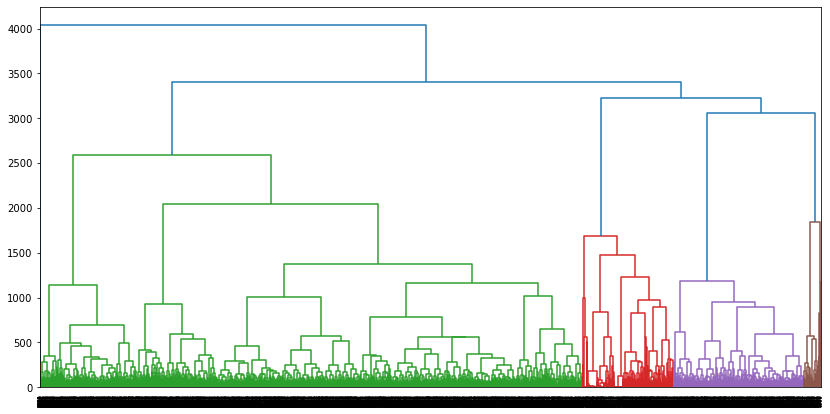

In [8]:
## Randomly sample 1% of the data frame
dat_obesity_fm_1 = dat_obesity_fm.sample(frac = 0.01,
                                          random_state = 110295)

## Run hierarchical clustering
plt.figure(figsize=(14, 7))
dend = shc.dendrogram(shc.linkage(dat_obesity_fm_1, 
                                  method='ward'))

### Part 2: Assign Labels to Sample and Identify Centroids

#### Identify Number of Clusters

In [9]:
Counter(dend['leaves_color_list']) #4 clusters

Counter({'C1': 2, 'C2': 4380, 'C3': 731, 'C4': 1047, 'C5': 140})

#### Clustering Sampled Data to Find Centroid

In [10]:
model_agg = AgglomerativeClustering(n_clusters = 4,
                                    affinity="euclidean",
                                    linkage = "ward")

yhat_agg = model_agg.fit_predict(dat_obesity_fm_1)

#### Finding Centroids

In [13]:
find_center = NearestCentroid()
find_center.fit(dat_obesity_fm_1, yhat_agg)
centoids = find_center.centroids_

NearestCentroid()

### Part 3. Run K-Means and DBSCAN to Get Full Clustering

#### KMeans with Centers from Agglomerative Clustering

In [17]:
model_kmeans = KMeans(n_clusters = 4,
                      random_state = 110295,
                      init = centoids)
yhat_kmeans = model_kmeans.fit_predict(dat_obesity_fm)

KMeans


/Users/catherinepollack/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


#### K-Means ++ 

In [ ]:
model_kmeans = KMeans(n_clusters = 4,
                      random_state = 110295,
                      init = "k-means++")
yhat_kmeans = model_kmeans.fit_predict(dat_obesity_fm)
print(silhouette_score(dat_obesity_fm, yhat_kmeans, metric='euclidean')) #0.358

#### DBSCAN

In [ ]:
model_db = DBSCAN()
yhat_db = model_db.fit_predict(dat_obesity_fm)

## Obesity Data

In [ ]:
print("Agglomerative")
model_agg = AgglomerativeClustering()
yhat_agg = model_agg.fit_predict(dat_obesity_fm)

print("DBSCAN")
model_db = DBSCAN()
yhat_db = model_db.fit_predict(dat_obesity_fm)

print("BIRCH")
model_birch= Birch()
yhat_birch = model_birch.fit_predict(dat_obesity_fm)

print("KMeans")
model_kmeans = KMeans()
yhat_kmeans = model_kmeans.fit_predict(dat_obesity_fm)

obesity_labels = pd.DataFrame({"agglomerate": yhat_agg,
                    "dbscan": yhat_db,
                    "birch": yhat_birch,
                    "kmeans": yhat_kmeans})

print("Silhouette Scores for Health Comparator")
print("Agglomerative")
print(silhouette_score(dat_obesity_fm, obesity_labels.agglomerate, metric='euclidean')) #0.358
print("DBSCAN")
print(silhouette_score(dat_obesity_fm, obesity_labels.dbscan, metric='euclidean')) #0.106
print("BIRCH")
print(silhouette_score(dat_obesity_fm, obesity_labels.birch, metric='euclidean')) #0.343
print("KMeans")
print(silhouette_score(dat_obesity_fm, obesity_labels.kmeans, metric='euclidean')) #0.241